# Introduction to Portfolio Theory: Risk Measures #

After studying benchmarks, Nancy concluded that she was somewhat fortunate to have chosen Nvidia stock as her first investment. Now, she wants to invest in an ETF because she believes it can help her maintain a medium-to-long-term investment strategy, as she is not ready for daily trading. Nancy wants to be more careful when choosing an ETF, so she compares three ETFs (SPY, IWY, and SPXL) and their risks.

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data

In [3]:
tickers = get_tickers(mod="1.3")

tickers

['SPY', 'IWY', 'SPXL']

In [4]:
# DataFrame to store everything
data = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    data = pd.concat([data, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for SPY
Data Ready for IWY
Data Ready for SPXL


In [5]:
data

,SPY,IWY,SPXL
2015-01-05 00:00:00,-0.018225,-0.016821,-0.055120
2015-01-06 00:00:00,-0.009464,-0.009333,-0.027999
2015-01-07 00:00:00,0.012384,0.012760,0.036523
2015-01-08 00:00:00,0.017589,0.018346,0.051831
2015-01-09 00:00:00,-0.008046,-0.007537,-0.025754
...,...,...,...
2024-12-24 00:00:00,0.011054,0.013657,0.030746
2024-12-26 00:00:00,0.000067,-0.001805,0.000055
2024-12-27 00:00:00,-0.010582,-0.014681,-0.032044
2024-12-30 00:00:00,-0.011477,-0.012155,-0.035386


The conceptual foundations and formulas of the forward concepts are presented in Section 2 of this module’s PDF. We highly recommend reading them before continuing with this notebook.

In [6]:
# 1. Annualized Volatility (Standard Deviation)
volatility = data.std() * np.sqrt(252)

print("Annualized Volatility:\n")
print(volatility)

Annualized Volatility:

SPY     0.176794
IWY     0.202666
SPXL    0.536495
dtype: float64


In [7]:
# 1.5 Annualized Variance (Standard Deviation)
variance = data.var() * 252

print("Annualized Variance:\n")
print(variance)

Annualized Variance:

SPY     0.031256
IWY     0.041074
SPXL    0.287827
dtype: float64


In [8]:
# 2. Covariance Matrix
covariance = data.cov() * 252  # Annualized

print("Covariance Matrix:\n")
print(covariance)

Covariance Matrix:

           SPY       IWY      SPXL
SPY   0.031256  0.034056  0.094679
IWY   0.034056  0.041074  0.103067
SPXL  0.094679  0.103067  0.287827


In [9]:
# 3. Correlations
correlations = data.corr()

print("Correlation Matrix:\n")
print(correlations)

Correlation Matrix:

           SPY       IWY      SPXL
SPY   1.000000  0.950480  0.998211
IWY   0.950480  1.000000  0.947923
SPXL  0.998211  0.947923  1.000000


In [10]:
# 4. Value at Risk
confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = data.mean() + z_score * data.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Annualized

print("Annualized Value at Risk (VaR) at 95% confidence level:\n")
print(VaR_95)

Annualized Value at Risk (VaR) at 95% confidence level:

SPY    -0.283083
IWY    -0.322967
SPXL   -0.869034
dtype: float64


In [11]:
# Download the Benchmark
benchmark = pd.read_csv(r'..\additional_data\sp500.csv')
benchmark.set_index('Date', inplace=True)
benchmark.index = pd.to_datetime(benchmark.index)

benchmark

,sp_500
Date,
2015-01-05,-0.018447
2015-01-06,-0.008933
2015-01-07,0.011563
2015-01-08,0.017730
2015-01-09,-0.008439
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [12]:
# Calculate the benchmark returns
benchmark_rets = benchmark['sp_500']

In [13]:
# Calculate the Excess Returns
excess_return = data.subtract(benchmark_rets.squeeze(), axis=0)

excess_return

,SPY,IWY,SPXL
2015-01-05 00:00:00,0.000222,0.001627,-0.036673
2015-01-06 00:00:00,-0.000530,-0.000400,-0.019065
2015-01-07 00:00:00,0.000822,0.001197,0.024960
2015-01-08 00:00:00,-0.000141,0.000616,0.034101
2015-01-09 00:00:00,0.000394,0.000902,-0.017315
...,...,...,...
2024-12-24 00:00:00,0.000071,0.002675,0.019764
2024-12-26 00:00:00,0.000472,-0.001399,0.000461
2024-12-27 00:00:00,0.000535,-0.003564,-0.020926
2024-12-30 00:00:00,-0.000718,-0.001395,-0.024627


In [14]:
# Now calculate the Tracking Error (which is the Std of the Excess Returns)
tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
SPY     0.009001
IWY     0.064476
SPXL    0.358185
dtype: float64


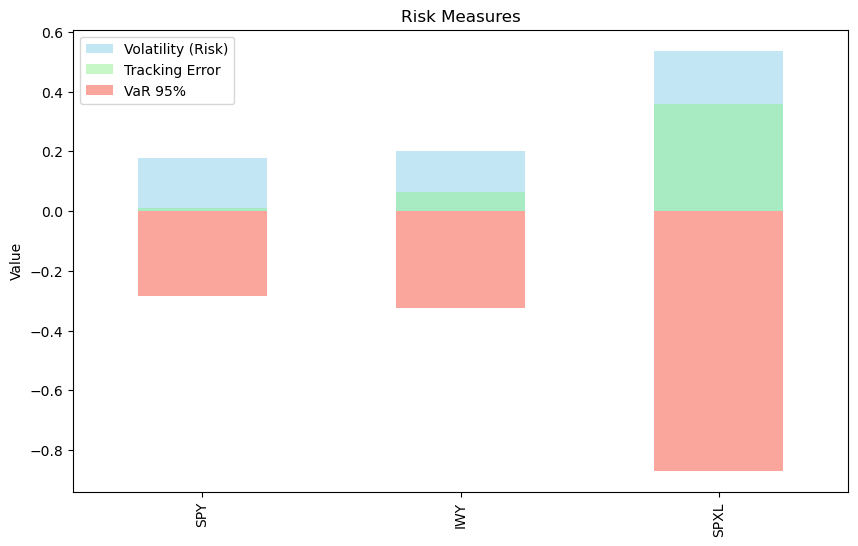

In [15]:
#Let us visualize the Risk Measures
fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
# Naturally, the SPXL is more risky that the other ETFs
mean = data.mean() * 252

print("Annualized Mean Returns:")
print(mean)

Annualized Mean Returns:
SPY     0.122495
IWY     0.164919
SPXL    0.213052
dtype: float64


In [17]:
# Risk Adjusted Returns
eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
SPY     0.692871
IWY     0.813744
SPXL    0.397119
dtype: float64


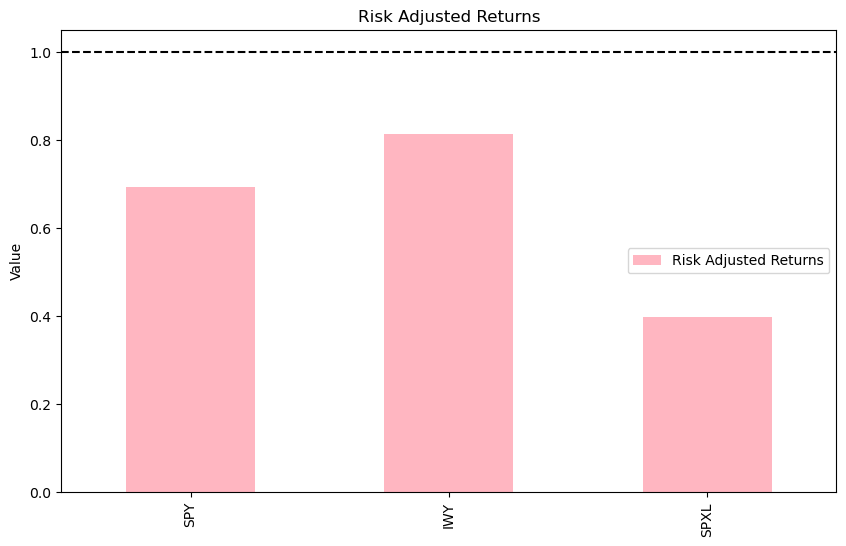

In [18]:
#Let us visualize
fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [18]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)

mean_bench = benchmark_rets.mean() * 252

var_bench = benchmark_rets.var() * 252

eff_rate_bench = mean_bench/var_bench

eff_rate_bench

3.2871963047109496